# TEST 6

## Student: Luis Vasquez
___

In [35]:
import warnings

warnings.filterwarnings('ignore')

### 1. (12 pts.) From this paper:

#### (a) (3 pts.) Show table 1: statistics of the 68 time-series of daily sea surface temperatures (sst’s) used for the study.

In [36]:
# loading data
import xarray as xr
data = xr.open_dataset('data.cdf').to_dataframe()
data

T_20  QT_5020  ST_6020
depth lat  lon   time                                               
0.0   -8.0 137.0 1991-01-01 12:00:00  1.000000e+35      0.0      0.0
                 1991-01-02 12:00:00  1.000000e+35      0.0      0.0
                 1991-01-03 12:00:00  1.000000e+35      0.0      0.0
                 1991-01-04 12:00:00  1.000000e+35      0.0      0.0
                 1991-01-05 12:00:00  1.000000e+35      0.0      0.0
...                                            ...      ...      ...
       9.0 265.0 2008-12-27 12:00:00  1.000000e+35      0.0      0.0
                 2008-12-28 12:00:00  1.000000e+35      0.0      0.0
                 2008-12-29 12:00:00  1.000000e+35      0.0      0.0
                 2008-12-30 12:00:00  1.000000e+35      0.0      0.0
                 2008-12-31 12:00:00  1.000000e+35      0.0      0.0

[578600 rows x 3 columns]

In [37]:
# Diferentiating data from different buoyes
unique_buoy_info = []
unique_buoy_identifier = 1

for lat_index, lat_df in data.groupby('lat'):
    for lon_index, lon_df in lat_df.groupby('lon'):
        working_df = lon_df.reset_index()
        working_df = working_df.sort_values(by='time')
        unique_buoy_info.append({unique_buoy_identifier: (lat_index, lon_index, list(working_df['T_20']) )})
        unique_buoy_identifier += 1

In [38]:
# Labeling data with it's corresponding latitude/longitude
import pandas as pd

noaa_data = {}

for index, buoy in enumerate(unique_buoy_info):
    buoy_data = list(buoy.values())[0]
    
    latitude = buoy_data[0]
    longitude = buoy_data[1]
    
    if latitude < 0:
        latitude *= -1
        latitude = str(int(latitude)) + "S"
        
    else:
        latitude = str(int(latitude)) + "N"
    
    if longitude > 180:
        longitude = 360 - longitude
        longitude = str(int(longitude)).zfill(3) + "W"
    else:
        longitude = str(int(longitude)).zfill(3) + "E"

    temp_feature_name = '{}{}'.format(latitude, longitude)
    noaa_data[temp_feature_name] = buoy_data[2]
    
noaa_df = pd.DataFrame(noaa_data)
noaa_df

,8S137E,8S147E,8S156E,8S165E,8S180E,8S170W,8S155W,8S140W,8S125W,8S110W,...,9N147E,9N156E,9N165E,9N180E,9N170W,9N155W,9N140W,9N125W,9N110W,9N095W
0,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,...,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,27.740000,1.000000e+35,1.000000e+35,1.000000e+35
1,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,...,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,27.730000,1.000000e+35,1.000000e+35,1.000000e+35
2,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,...,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,27.730000,1.000000e+35,1.000000e+35,1.000000e+35
3,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,...,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,27.629999,1.000000e+35,1.000000e+35,1.000000e+35
4,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,...,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,27.680000,1.000000e+35,1.000000e+35,1.000000e+35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,1.000000e+35,1.000000e+35,1.000000e+35,3.042000e+01,2.953000e+01,2.912000e+01,2.846000e+01,1.000000e+35,2.590000e+01,2.409000e+01,...,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,25.450001,1.000000e+35,1.000000e+35,1.000000e+35
6571,1.000000e+35,1.000000e+35,1.000000e+35,3.031000e+01,2.942000e+01,2.909000e+01,2.845000e+01,1.000000e+35,2.588000e+01,2.410000e+01,...,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,25.250000,1.000000e+35,1.000000e+35,1.000000e+35
6572,1.000000e+35,1.000000e+35,1.000000e+35,3.026000e+01,2.937000e+01,2.909000e+01,2.846000e+01,1.000000e+35,2.588000e+01,2.416000e+01,...,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,25.459999,1.000000e+35,1.000000e+35,1.000000e+35
6573,1.000000e+35,1.000000e+35,1.000000e+35,3.060000e+01,2.935000e+01,2.905000e+01,2.846000e+01,1.000000e+35,2.589000e+01,2.418000e+01,...,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,1.000000e+35,25.639999,1.000000e+35,1.000000e+35,1.000000e+35


In [39]:
# Creating the corresponding timestamps for each ordered data entry
time_stamps = data.reset_index()['time'].unique()
time_stamps

array(['1991-01-01T12:00:00.000000000', '1991-01-02T12:00:00.000000000',
       '1991-01-03T12:00:00.000000000', ...,
       '2008-12-29T12:00:00.000000000', '2008-12-30T12:00:00.000000000',
       '2008-12-31T12:00:00.000000000'], dtype='datetime64[ns]')

In [40]:
# Identifying NaN's
noaa_df[noaa_df > 1e35] = None
noaa_df['time'] = time_stamps

In [41]:
noaa_df

,8S137E,8S147E,8S156E,8S165E,8S180E,8S170W,8S155W,8S140W,8S125W,8S110W,...,9N156E,9N165E,9N180E,9N170W,9N155W,9N140W,9N125W,9N110W,9N095W,time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27.740000,NaN,NaN,NaN,1991-01-01 12:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27.730000,NaN,NaN,NaN,1991-01-02 12:00:00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27.730000,NaN,NaN,NaN,1991-01-03 12:00:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27.629999,NaN,NaN,NaN,1991-01-04 12:00:00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27.680000,NaN,NaN,NaN,1991-01-05 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,NaN,NaN,NaN,30.420000,29.530001,29.120001,28.459999,NaN,25.900000,24.090000,...,NaN,NaN,NaN,NaN,NaN,25.450001,NaN,NaN,NaN,2008-12-27 12:00:00
6571,NaN,NaN,NaN,30.309999,29.420000,29.090000,28.450001,NaN,25.879999,24.100000,...,NaN,NaN,NaN,NaN,NaN,25.250000,NaN,NaN,NaN,2008-12-28 12:00:00
6572,NaN,NaN,NaN,30.260000,29.370001,29.090000,28.459999,NaN,25.879999,24.160000,...,NaN,NaN,NaN,NaN,NaN,25.459999,NaN,NaN,NaN,2008-12-29 12:00:00
6573,NaN,NaN,NaN,30.600000,29.350000,29.049999,28.459999,NaN,25.889999,24.180000,...,NaN,NaN,NaN,NaN,NaN,25.639999,NaN,NaN,NaN,2008-12-30 12:00:00


In [42]:
# Selecting table indexing (from the one suggested in the paper)
buoy_indexing = "9N140W 8N137E 8N156E 8N156E 8N165E 8N180E 8N170W 8N155W 8N125W 8N110W 8N095W 5N137E 5N147E 5N156E 5N165E 5N180E 5N170W 5N155W 5N140W 5N125W 5N110W 5N095W 2N137E 2N147E 2N156E 2N165E 2N180E 2N170W 2N155W 2N140W 2N125W 2N110W 2N095W 0N137E 0N147E 0N156E 0N165E 0N180E 0N170W 0N155W 0N140W 0N125W 0N110W 0N095W 2S156E 2S165E 2S180E 2S170W 2S155W 2S140W 2S125W 2S110W 2S095W 5S156E"
buoy_indexing = buoy_indexing.split()

In [43]:
# Generating the resultant table
final_table_data = []

for buoy_loc in buoy_indexing:
    final_table_data.append([buoy_loc,
          len(noaa_df[buoy_loc].dropna()),
          noaa_df[buoy_loc].dropna().mean().round(2),
          noaa_df[buoy_loc].dropna().std().round(2),
          noaa_df[buoy_loc].dropna().min().round(2),
          noaa_df[buoy_loc].dropna().max().round(2)])
    
stats_table = pd.DataFrame(final_table_data, columns=['Site', 'Freq', 'Mean', 'St.Dev.', 'MIN', 'MAX'])
display(HTML('<h1>Table 1:</h1>'))
display(stats_table)

,Site,Freq,Mean,St.Dev.,MIN,MAX
0,9N140W,6554,27.44,0.87,24.41,29.38
1,8N137E,2650,29.14,0.62,26.75,30.81
2,8N156E,4354,29.07,0.54,27.36,30.65
3,8N156E,4354,29.07,0.54,27.36,30.65
4,8N165E,6279,28.84,0.59,26.61,30.77
5,8N180E,4832,28.57,0.64,26.57,30.48
6,8N170W,5798,28.39,0.67,26.57,30.19
7,8N155W,5496,27.97,0.76,25.46,29.83
8,8N125W,5255,27.70,0.63,25.25,29.39
9,8N110W,5945,27.90,0.75,25.48,30.08


___
___

### 2. **(8 pts.)** From this paper reproduce figures 1, 2, 3 and 4. Each graphic worths 2 points.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

from IPython.core.display import HTML

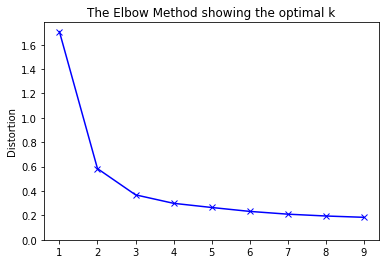

In [45]:
iris = load_iris()

x = pd.DataFrame(iris.data, columns=iris['feature_names'])

data = x[['petal length (cm)', 'petal width (cm)']]

distortions = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    distortions[k] = sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0]

display(HTML('<h1>Figure 1:</h1>'))
plt.plot(list(distortions.keys()), list(distortions.values()), marker='x', c='b')
plt.xticks(np.arange(1, 10, 1))
plt.yticks(np.arange(0, 1.8, 0.2))
plt.title("The Elbow Method showing the optimal k")
plt.ylabel("Distortion")
plt.show()

In [46]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
data['cluster'] = kmeans.labels_

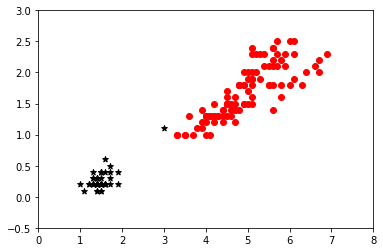

In [47]:
color = {0: 'r', 1:'#000000'}

display(HTML('<h1>Figure 2:</h1>'))
plt.scatter(data.loc[data['cluster'] == 0]['petal length (cm)'], data.loc[data['cluster'] == 0]['petal width (cm)'], c='r')
plt.scatter(data.loc[data['cluster'] == 1]['petal length (cm)'], data.loc[data['cluster'] == 1]['petal width (cm)'], c='#000000', marker='*')
plt.xticks(np.arange(0, 9, 1))
plt.yticks(np.arange(-0.5, 3.5, 0.5))
#plt.scatter(data['petal length (cm)'], data['petal width (cm)'], color=[color[c] for c in data['cluster']])
plt.show()

In [48]:
from gap_statistic import OptimalK

x = data.iloc[:,[0,1]].values

optimalK = OptimalK()
n_clusters = optimalK(x, cluster_array=np.arange(1, 10))
optimalK.gap_df

,n_clusters,gap_value,gap*,ref_dispersion_std,diff,diff*
0,1.0,-3.110087,-526.323866,0.394112,-1.281791,-372.251276
1,2.0,-1.760078,-71.502445,0.878529,-0.461988,-23.304757
2,3.0,-1.249071,-22.366917,0.377595,-0.048960,6.211351
3,4.0,-1.137804,-13.260928,0.336845,0.265775,17.209714
4,5.0,-1.309035,-14.137821,0.439104,-0.158540,4.442760
5,6.0,-1.088055,-8.621578,0.233903,-0.148862,3.597883
6,7.0,-0.912547,-5.670713,0.087100,0.137371,5.685912
7,8.0,-1.007431,-5.270005,0.110724,0.079491,5.635574
8,9.0,-1.078285,-5.061276,0.019569,NaN,NaN


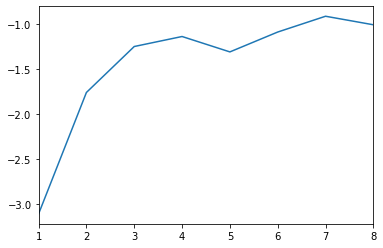

In [49]:
display(HTML('<h1>Figure 3:</h1>'))
plt.plot(optimalK.gap_df['n_clusters'], optimalK.gap_df['gap_value'])
plt.xlim([1,8])
plt.show()
#plt.ylim([-0.2,1.2])

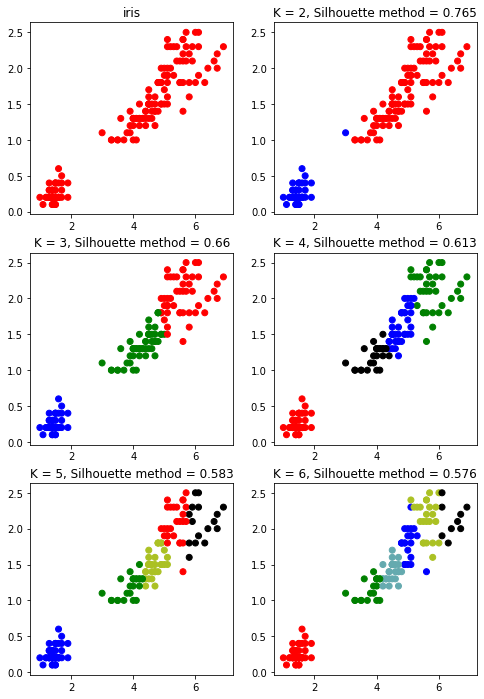

In [50]:
from sklearn.metrics import silhouette_score

original_data = data.iloc[:,[0,1]]

fig, axs = plt.subplots(3, 2, figsize=(8,12))

colors = {0:'r', 1:'b', 2:'g', 3:'#000000', 4:'#abc123', 5:'#65aaaf', 6:'#ab3434'}

display(HTML('<h1>Figure 4:</h1>'))

for k, ax in zip(range(1, 7), axs.flatten()):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(original_data)
    labels = kmeans.labels_
    
    if k != 1:
        silhouette_val = silhouette_score(original_data, labels)
        ax.title.set_text('K = {}, Silhouette method = {}'.format(k, round(silhouette_val, 3)))
    else:
        ax.title.set_text('iris')
    ax.scatter(original_data['petal length (cm)'], original_data['petal width (cm)'], c=[colors[label] for label in labels])
    
plt.show()